In [57]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

""" Inspect cancellations df """
print("------------------------------")
cancellations = pd.read_csv('Client Cancellations0.csv')
print(cancellations.info())
print(cancellations.head()) #swap service codes for service names with service table 

# Viewing null values 
null_cancellations = cancellations[cancellations.isna().any(axis=1)] 
print("The rows containing null values are")
print(null_cancellations) # Shows null values due to same day cancellation 

# Check for duplicates 
canc_duplicates = cancellations[cancellations.duplicated()]
print("The duplicate rows")
print(canc_duplicates) # I should drop the duplicate except when comparing cancellations per employee
print("------------------------------")

""" Inspect services """
print("------------------------------")
services = pd.read_csv('Service Listing0.csv')
print(services.info())
print(services.head())

# Viewing null values 
null_services = services[services.isna().any(axis=1)]
print(null_services) # The missing data isnt required for my analysis 


------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Cancel Date   243 non-null    object 
 1   Code          243 non-null    object 
 2   Service       243 non-null    object 
 3   Staff         243 non-null    object 
 4   Booking Date  243 non-null    object 
 5   Canceled By   243 non-null    object 
 6   Days          241 non-null    float64
dtypes: float64(1), object(6)
memory usage: 13.4+ KB
None
  Cancel Date    Code Service   Staff Booking Date Canceled By  Days
0  05/22/2018  MASA01     CFC  JOANNE   05/24/2018       ADMIN   2.0
1  06/27/2018  MASA01    CBAL   KELLY   06/27/2018       ADMIN   0.0
2  07/03/2018  MASA01    SHCM   BECKY   07/10/2018       BECKY   7.0
3  07/10/2018  MASA01    SHCC      JJ   07/11/2018       KELLY   1.0
4  07/24/2018  TRUA01    SHCM   KELLY   07/24/2018       TANYA   0.0
The ro

In [58]:
# Most cancellaitons per customer
max_canc_customer = np.max(cancellations.Code.value_counts())
print("The most cancellations of any customer is", max_canc_customer)

# The total cancellations and average cancellations per customer 
total_cancels_customer = cancellations.Code.value_counts()
total_cancellations = np.sum(total_cancels_customer)
average_cancels_customer = total_cancellations / len(total_cancels_customer)

print("The total cancellations:", total_cancellations)
print("Average cancellations per customer: ", average_cancels_customer)

The most cancellations of any customer is 11
The total cancellations: 243
Average cancellations per customer:  1.62


The most cancellations of any staff member is:  70
The average cancellations per Staff member is 40.5


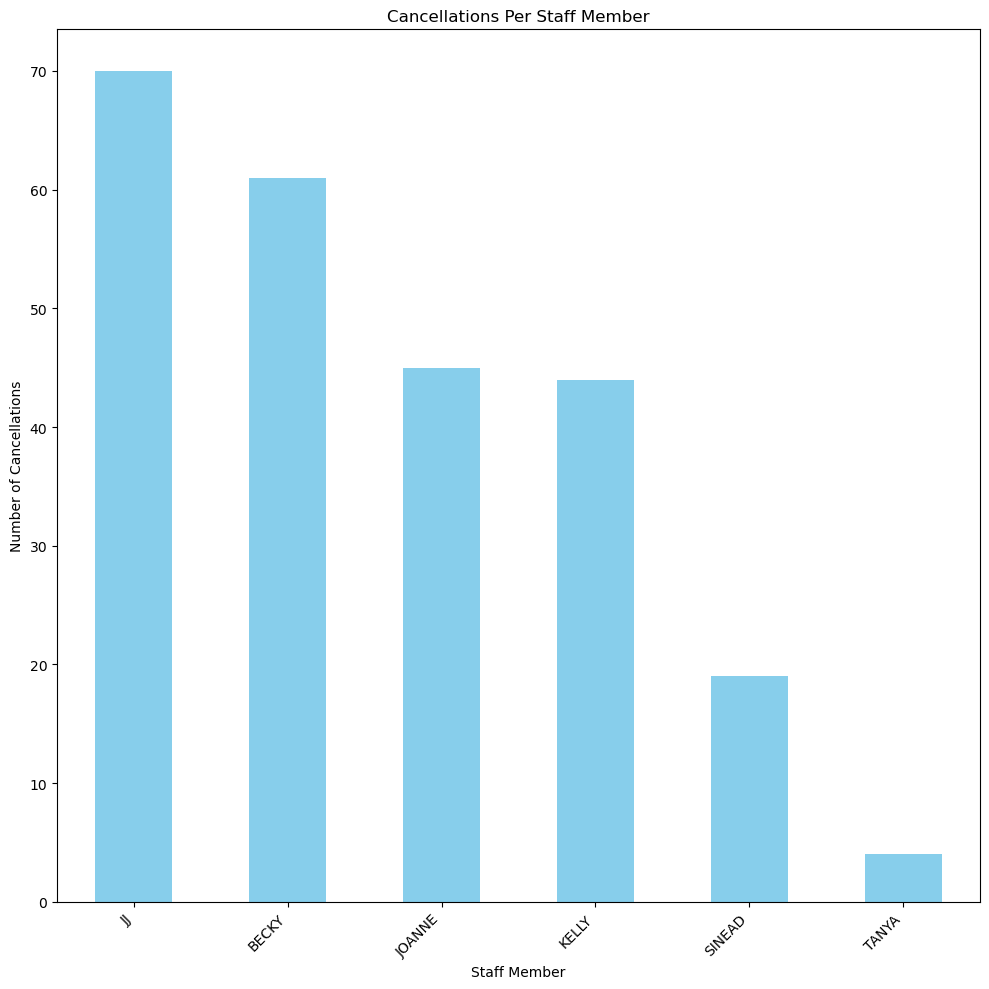

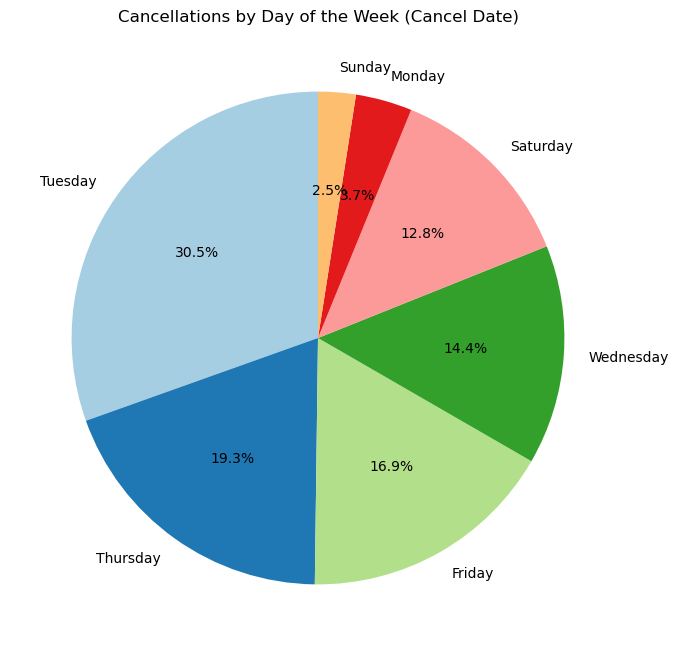

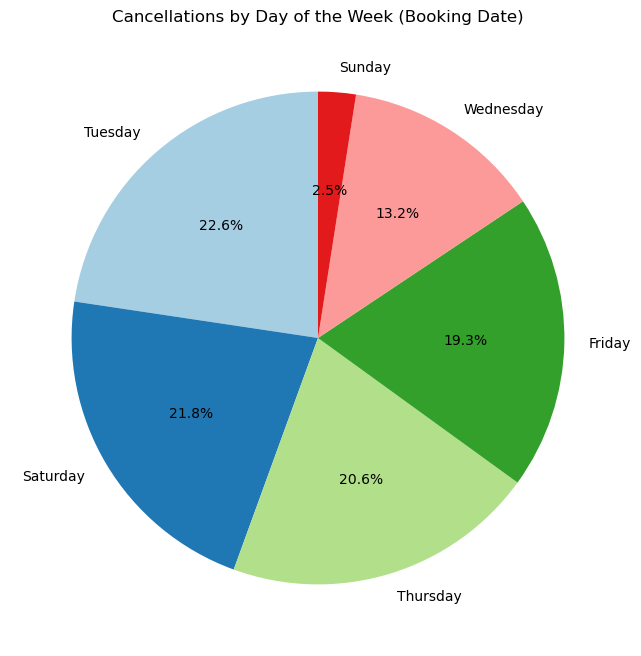

In [59]:
# Which staff has the most appointments cancelled 
max_canc_staff = np.max(cancellations.Staff.value_counts())
print("The most cancellations of any staff member is: ", max_canc_staff) # who is that 

# The average cancellations 
total_cancels_staff = cancellations.Staff.value_counts()
total_staff_canc =  np.sum(total_cancels_staff)
avg_cancels_staff = total_staff_canc / len(total_cancels_staff)

print("The average cancellations per Staff member is", avg_cancels_staff)

# Create a bar chart
plt.figure(figsize=(10, 10))  
total_cancels_staff.plot(kind='bar', color='skyblue')
plt.title('Cancellations Per Staff Member')
plt.xlabel('Staff Member')
plt.ylabel('Number of Cancellations')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()


# Cancellations per day 
cancellations['Cancel Date'] = pd.to_datetime(cancellations['Cancel Date'])  
cancellations['Cancel Day'] = cancellations['Cancel Date'].dt.day_name()  # Get the day of the week

# Count cancellations per day 
cancel_day_counts = cancellations['Cancel Day'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
cancel_day_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Cancellations by Day of the Week (Cancel Date)')
plt.ylabel('') 
plt.show()


# Cncellations per day (booking)
cancellations['Booking Date'] = pd.to_datetime(cancellations['Booking Date'])  # Ensure 'Booking Date' is in datetime format
cancellations['Booking Day'] = cancellations['Booking Date'].dt.day_name()  # Get the day of the week

# Count cancellations for each day of the week (booking)
booking_day_counts = cancellations['Booking Day'].value_counts()

# Ceate pie chart
plt.figure(figsize=(8, 8))
booking_day_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Cancellations by Day of the Week (Booking Date)')
plt.ylabel('')  # Hides the y-axis label
plt.show()


66.0
Days
 66.0     1
 61.0     1
 55.0     1
 53.0     1
 46.0     1
 42.0     3
 39.0     1
 28.0     2
 25.0     1
 22.0     1
 20.0     1
 18.0     4
 17.0     1
 16.0     1
 15.0     1
 14.0     6
 13.0     1
 12.0     1
 10.0     4
 9.0      4
 8.0     10
 7.0     17
 6.0      4
 5.0      5
 4.0      9
 3.0     16
 2.0     19
 1.0     45
 0.0     78
-37.0     1
Name: count, dtype: int64


C:\Users\neivi\AppData\Local\Temp\ipykernel_5372\3371468934.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=max_days_sorted.index.astype(str), y=max_days_sorted.values, palette='viridis')


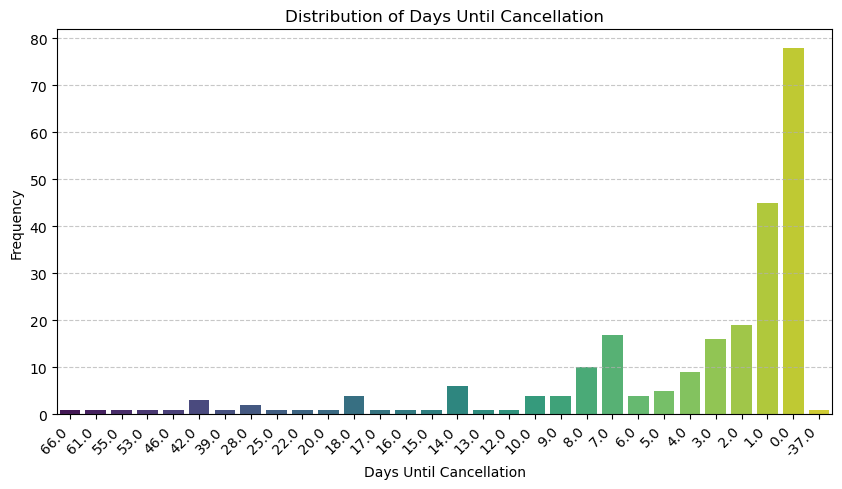

    Cancel Date    Code Service   Staff Booking Date Canceled By  Days  \
0    2018-05-22  MASA01     CFC  JOANNE   2018-05-24       ADMIN     2   
1    2018-06-27  MASA01    CBAL   KELLY   2018-06-27       ADMIN     0   
2    2018-07-03  MASA01    SHCM   BECKY   2018-07-10       BECKY     7   
3    2018-07-10  MASA01    SHCC      JJ   2018-07-11       KELLY     1   
4    2018-07-24  TRUA01    SHCM   KELLY   2018-07-24       TANYA     0   
..          ...     ...     ...     ...          ...         ...   ...   
238  2018-05-06  ROUT01     SBD      JJ   2018-05-06          JJ     0   
239  2018-06-07  ALCV01     CFC   KELLY   2018-06-07       KELLY     0   
240  2018-06-26  FISV01     CFC  JOANNE   2018-06-30          JJ     4   
241  2018-05-04  MCGV01     SBD   BECKY   2018-05-04          JJ     0   
242  2018-05-18  MIRY01    CDPB  JOANNE   2018-05-19      JOANNE     1   

    Cancel Day Booking Day  Booked on  
0      Tuesday    Thursday 2018-05-20  
1    Wednesday   Wednesday 2018

In [60]:
# The most days between booking day and cancellation day 
max_days = cancellations.Days.max()
print(max_days) # 66 days seems like a lot I should look into this 

max_days_sorted = cancellations.Days.value_counts().sort_index(ascending=False)
print(max_days_sorted)


# Plot the bar char
plt.figure(figsize=(10, 5))
sns.barplot(x=max_days_sorted.index.astype(str), y=max_days_sorted.values, palette='viridis')

plt.xlabel('Days Until Cancellation')
plt.ylabel('Frequency')
plt.title('Distribution of Days Until Cancellation')
plt.xticks(rotation=45, ha='right') 
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.show()


# Convert Cancel Date to datetime 
cancellations['Cancel Date'] = pd.to_datetime(cancellations['Cancel Date'], format='%m/%d/%Y')

# Fill NaN values in 'Days' column with 0
cancellations['Days'] = cancellations['Days'].fillna(0).astype(int)

# Convert Days to integers
cancellations['Days'] = cancellations['Days'].astype(int)

# Calculate the Booking Date by subtracting Days from Cancel Date
cancellations['Booked on'] = cancellations['Cancel Date'] - pd.to_timedelta(cancellations['Days'], unit='D')
print(cancellations)


# Convert Booking Date to datetime
cancellations['Booking Date'] = pd.to_datetime(cancellations['Booking Date'], errors='coerce')

# Convert Cancel Date to datetime
cancellations['Cancel Date'] = pd.to_datetime(cancellations['Cancel Date'], errors='coerce')

# Convert Booking Date to number of days since the earliest Booking Date
reference_date = cancellations['Booking Date'].min()  
cancellations['Booking Date Numeric'] = (cancellations['Booking Date'] - reference_date).dt.days

# Correlation between Booking Date and Days
booked_days_corr = cancellations[['Booking Date Numeric', 'Days']].corr()
print(booked_days_corr) # value close to 0 therefore no correlation 



KeyError: 'Cancelled'